## 앙상블의 종류

### 1. 투표방식
- 여러개의 추정기(Estimator)가 낸 결과들을 투표를 통해 최종 결과를 내는 방식
- 여러 모델에 같은 학습을 시켜 오차가 적은 모델을 선택
- 동시 학습이 가능
- 종류
    1. Voting - 서로 다른 종류의 알고리즘들을 결합한다.
    2. Bagging - 같은 유형의 알고리즘들을 조합하되 각각 학습하는 데이터를 다르게 한다. 
        - Random Forest가 Bagging을 기반으로 한다.
    
### 2. 부스팅(Boosting)    
- 약한 학습기(Weak Learner)들을 결합해서 보다 정확하고 강력한 학습기(Strong Learner)를 만든다.
- 앞 모델을 먼저 학습시킨 후 오차를 다음 모델에 집중적으로 학습시켜 오차를 줄여나감
- 순차적으로 학습시키므로 속도가 느림


# Voting

## Voting의 유형
1. **hard voting**
    - 다수의 추정기가 결정한 예측값들 중 많은 것을 선택하는 방식
    
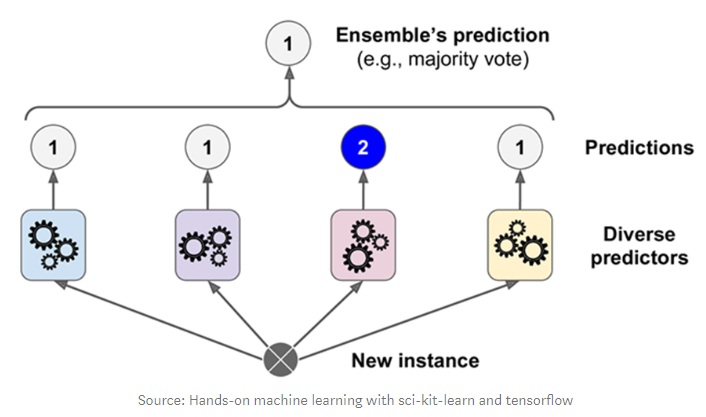  

2. **soft voting**
    - 다수의 추정기에서 각 레이블별 예측한 **확률**들의 평균을 내서 높은 레이블값을 결과값으로 선택하는 방식

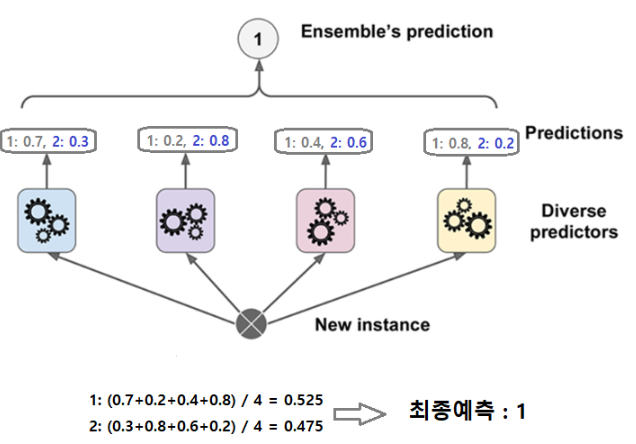

- 일반적으로 soft voting이 성능이 더 좋다.    

## VotingClassifier 클래스 이용
- 매개변수
    - estimators : 앙상블할 모델들 설정.  ("추정기이름", 추정기) 의 튜플을 리스트로 묶어서 전달
    - voting: voting 방식. hard(기본값), soft  지정

In [34]:
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()
X=cancer.data
y=cancer.target
# X,y=load_breast_cancer(return X_y=True)  # 데이터를 한번에 가져오는 방법 (거의 사용하지 않음)

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X, y, stratify=y)

In [36]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaler=scaler.fit_transform(X_train)
X_test_scaler=scaler.transform(X_test)

In [45]:
# 평가지표를 묶어서 출력하는 함수
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score

def print_metrics(y, pred, title=None):
    acc=accuracy_score(y, pred)
    recall=recall_score(y, pred)
    precision=precision_score(y, pred)
    roc_auc=roc_auc_score(y, pred)
    if title:
        print(title)
    print(f'정확도:{acc}, 재현율:{recall}, 정밀도:{precision}, AUC:{roc_auc}')

In [46]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

In [47]:
# 각 모델 생성
knn=KNeighborsClassifier(n_neighbors=5)
tree=DecisionTreeClassifier(max_depth=5)
svm=SVC(C=0.1, gamma=0.1, probability=True)  
# SCV: Probability=True 일 때 predict_proba() 함수 사용 가능 => soft voting을 사용하기 위해

In [48]:
estimators=[('knn', knn),('결정트리',tree),('svm',svm)]
vote_clf=VotingClassifier(estimators=estimators) # 기본방식: hard voting

In [58]:
vote_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('knn',
                              KNeighborsClassifier(algorithm='auto',
                                                   leaf_size=30,
                                                   metric='minkowski',
                                                   metric_params=None,
                                                   n_jobs=None, n_neighbors=5,
                                                   p=2, weights='uniform')),
                             ('결정트리',
                              DecisionTreeClassifier(class_weight=None,
                                                     criterion='gini',
                                                     max_depth=5,
                                                     max_features=None,
                                                     max_leaf_nodes=None,
                                                     min_impurity_decrease=0.0,
                                                     min_i

In [59]:
pred_train=vote_clf.predict(X_train)
print_metrics(y_train, pred_train)

정확도:0.9413145539906104, 재현율:0.9700374531835206, 정밀도:0.9384057971014492, AUC:0.9315596070949049


In [60]:
pred_test=vote_clf.predict(X_test)
print_metrics(y_test, pred_test)

정확도:0.958041958041958, 재현율:0.9777777777777777, 정밀도:0.9565217391304348, AUC:0.9511530398322852


In [74]:
from sklearn.model_selection import GridSearchCV

knn=KNeighborsClassifier(n_neighbors=5)
tree=DecisionTreeClassifier(max_depth=5)
# svm=SVC(C=0.1, gamma=0.1, probability=True) 
param={
    'C':[0.01, 0.1, 1, 10],
    'gamma':[0.01, 0.1, 1, 10]
}
svm=GridSearchCV(SVC(probability=True), param_grid=param, cv=3)

In [75]:
estimators=[('knn', knn),('결정트리',tree),('svm',svm)]
vote_clf=VotingClassifier(estimators=estimators, voting='soft') # soft voting

In [76]:
vote_clf.fit(X_train, y_train)
print_metrics(y_train, pred_train)

정확도:0.9413145539906104, 재현율:0.9700374531835206, 정밀도:0.9384057971014492, AUC:0.9315596070949049


In [79]:
pred_train=vote_clf.predict(X_train)
print_metrics(y_train, pred_train)

정확도:0.9953051643192489, 재현율:1.0, 정밀도:0.9925650557620818, AUC:0.9937106918238994


In [80]:
pred_test=vote_clf.predict(X_test)
print_metrics(y_test, pred_test)

정확도:0.965034965034965, 재현율:0.9666666666666667, 정밀도:0.9775280898876404, AUC:0.9644654088050315
